# HNCDI Explain: Mathematical Fundamentals of Quantum Computing

## Tutorial 1: Create a Bell state on a Simulator and on IBMQ

In [1]:
# Default imports
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer, IBMQ
from qiskit.compiler import transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account() # Comment for local use with simulators only

In [2]:
# Notebook imports
from qiskit.providers.ibmq import least_busy

# pi approximation
from qiskit import assemble
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt

In [3]:
# Version Information
%qiskit_version_table

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Create your Bell state circuit

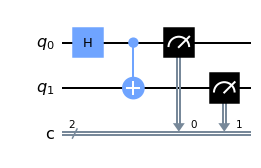

In [4]:
# Create your Bell state circuit

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

## Submit Bell state circuit to a simulator

In [5]:
# View backends
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [6]:
# Set simulator backend
simulator_backend = Aer.get_backend('aer_simulator')

In [7]:
# Submit job to simulator backend
simulator_job = simulator_backend.run(circuit, shots=1024)

In [8]:
# List measurement outcomes
simulator_job_counts = simulator_job.result().get_counts()
simulator_job_counts

{'00': 506, '11': 518}

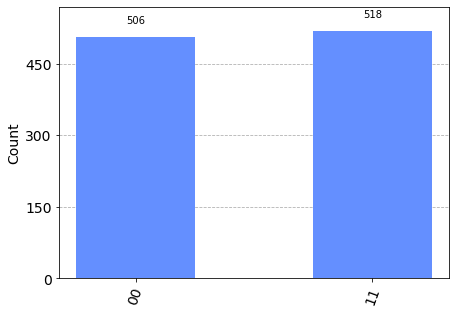

In [9]:
# Plot measurement outcomes 
plot_histogram(simulator_job_counts)

## Submit your Bell state circuit to real quantum hardware

In [10]:
# View backends
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [11]:
# Visual overview of available machines

%qiskit_backend_overview

In [12]:
# Find least busy machine to submit a job to. Set IBMQ backend to this machine.

ibmq_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                            and not x.configuration().simulator 
                                            and x.status().operational==True))                
ibmq_backend

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

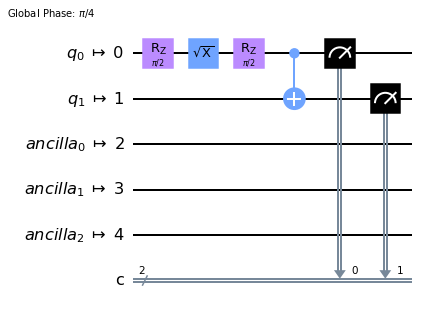

In [13]:
# Transpile your circuit for the IBMQ backend
transpiled_circuit = transpile(circuit, ibmq_backend)
transpiled_circuit.draw()

In [14]:
# Submit job to IBMQ backend
ibmq_job = ibmq_backend.run(transpiled_circuit, shots=1024)

In [15]:
# List measurement outcomes
ibmq_job_counts = ibmq_job.result().get_counts()
ibmq_job_counts

{'00': 476, '01': 43, '10': 45, '11': 460}

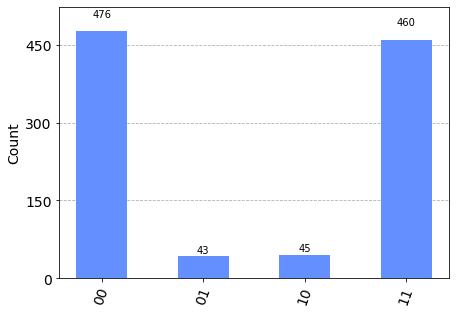

In [16]:
# Plot measurement outcomes
plot_histogram(ibmq_job_counts)